In [1]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib.font_manager as fm

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns=25

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url = 'http://stats.nba.com/stats/shotchartdetail?'\
        'CFID=&CFPARAMS=&ContextFilter=&ContextMeasure=FGA'\
        '&Counter=1000&DateFrom=&DateTo=&Direction=DESC'\
        '&GameID=0021500051&GameSegment=&LastNGames=0&LeagueID=00'\
        '&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0'\
        '&PlayerID=0&PlayerOrTeam=T&Position=&RookieYear='\
        '&Season=2015-16&SeasonSegment=&SeasonType=Regular+Season'\
        '&Sorter=PTS&TeamID=1610612744&VsConference=&VsDivision='
response = requests.get(url)
response.json().keys()

[u'resource', u'resultSets', u'parameters']

In [3]:
resource = response.json()["resource"]
resultsSets = response.json()["resultSets"]
parameters = response.json()["parameters"]
print resource
parameters

shotchartdetail


{u'AheadBehind': None,
 u'ClutchTime': None,
 u'ContextFilter': u'',
 u'ContextMeasure': u'FGA',
 u'DateFrom': None,
 u'DateTo': None,
 u'EndPeriod': None,
 u'EndRange': None,
 u'GameID': u'0021500051',
 u'GameSegment': None,
 u'LastNGames': 0,
 u'LeagueID': u'00',
 u'Location': None,
 u'Month': 0,
 u'OpponentTeamID': 0,
 u'Outcome': None,
 u'Period': 0,
 u'PlayerID': 0,
 u'PointDiff': None,
 u'Position': None,
 u'RangeType': None,
 u'RookieYear': None,
 u'Season': u'2015-16',
 u'SeasonSegment': None,
 u'SeasonType': u'Regular Season',
 u'StartPeriod': None,
 u'StartRange': None,
 u'TeamID': 1610612744,
 u'VsConference': None,
 u'VsDivision': None}

In [4]:
print type(resultsSets)

<type 'list'>


In [5]:
print len(resultsSets)

2


In [6]:
[type(r) for r in resultsSets]

[dict, dict]

In [7]:
[r.keys() for r in resultsSets]

[[u'headers', u'rowSet', u'name'], [u'headers', u'rowSet', u'name']]

In [8]:
[r['name'] for r in resultsSets]

[u'Shot_Chart_Detail', u'LeagueAverages']

In [9]:
resultsSets[0]['headers']

[u'GRID_TYPE',
 u'GAME_ID',
 u'GAME_EVENT_ID',
 u'PLAYER_ID',
 u'PLAYER_NAME',
 u'TEAM_ID',
 u'TEAM_NAME',
 u'PERIOD',
 u'MINUTES_REMAINING',
 u'SECONDS_REMAINING',
 u'EVENT_TYPE',
 u'ACTION_TYPE',
 u'SHOT_TYPE',
 u'SHOT_ZONE_BASIC',
 u'SHOT_ZONE_AREA',
 u'SHOT_ZONE_RANGE',
 u'SHOT_DISTANCE',
 u'LOC_X',
 u'LOC_Y',
 u'SHOT_ATTEMPTED_FLAG',
 u'SHOT_MADE_FLAG']

In [10]:
resultsSets[0]['rowSet'][0]

[u'Shot Chart Detail',
 u'0021500051',
 4,
 203084,
 u'Harrison Barnes',
 1610612744,
 u'Golden State Warriors',
 1,
 11,
 27,
 u'Missed Shot',
 u'Turnaround Jump Shot',
 u'2PT Field Goal',
 u'Mid-Range',
 u'Left Side(L)',
 u'8-16 ft.',
 11,
 -110,
 46,
 1,
 0]

Let's load the `resultsSets[0]` into a dataframe using the header for column labels

In [11]:
sc_df = pd.DataFrame(resultsSets[0]['rowSet'],columns=resultsSets[0]['headers'])
sc_df.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500051,4,203084,Harrison Barnes,1610612744,Golden State Warriors,1,11,27,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,46,1,0
1,Shot Chart Detail,0021500051,11,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,36,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-210,188,1,1
2,Shot Chart Detail,0021500051,13,203110,Draymond Green,1610612744,Golden State Warriors,1,10,5,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-173,203,1,1
3,Shot Chart Detail,0021500051,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Made Shot,Running Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-160,120,1,1
4,Shot Chart Detail,0021500051,26,203084,Harrison Barnes,1610612744,Golden State Warriors,1,8,35,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,22,26,1,0


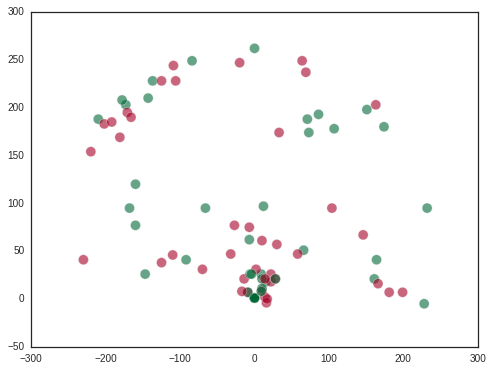

In [17]:

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(8, 6))

scat = plt.scatter(x=sc_df.LOC_X,y=sc_df.LOC_Y,c=sc_df.SHOT_MADE_FLAG,
    cmap=plt.cm.RdYlGn, s=100, alpha=.6)
#plt.style.use('grayscale')
#court = plt.imread("img/halfcourt.png")
#img = plt.imshow(court, zorder=0, extent=[0,94,50,0])
#plt.style.use('seaborn-white')
#cbar = fig.colorbar(scat,orientation='vertical',fraction=0.025)
#cbar.ax.invert_xaxis()
#cbar.ax.set_ylabel('Ball height (ft.) above court')
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
#import matplotlib.font_manager as fm
# zorder should be less than zorder of scatter, so court is drawn first.
#annotation_font = fm.FontProperties(family='Bitstream Vera Sans',style='normal',size=10,weight='normal',stretch='normal')
#scat.annotate('[START] Connelly drives baseline',
#              xy = ball_xdat

#
#plt.imshow(court, zorder=0, extent=[0,94,50,0])

#plt.xlim(0,94)
plt.show()

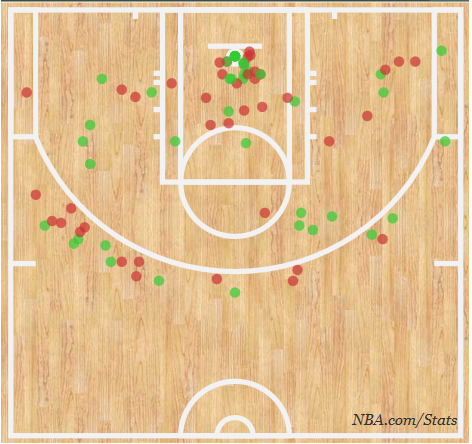

In [16]:
from IPython.display import Image
Image('img/example_nba_shotchart.png')

Okay, so we can see that the court is flipped on the NBA website. So I will flip my y-axis

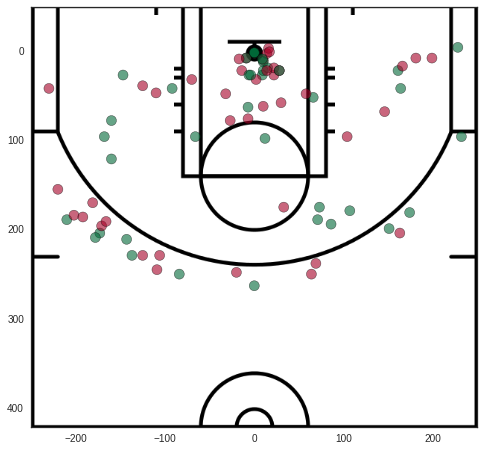

In [33]:
plt.style.use('seaborn-white')

fig,ax = plt.subplots(figsize=(8, 8))
scat = plt.scatter(x=sc_df.LOC_X,y=sc_df.LOC_Y,c=sc_df.SHOT_MADE_FLAG,
    cmap=plt.cm.RdYlGn, s=100, alpha=.6, zorder=1)
ax.invert_yaxis()

plt.style.use('grayscale')
court = plt.imread("img/halfcourt.png")
img = plt.imshow(court, zorder=0, extent=[-250,250,420,-50])

plt.show()

Great, I can make sense and plot the data from nba.com.  Now I will get shot data for all players for the 2015-16 season and determine the best shooter from each zone.

Steps
1. Get playerids for all players this year
2. Pull shot data for each
3. Parse the data into a table with rows of players, columns of zone1_attempts zone1_made, etc.
4. Calculate best for each zone

In [102]:
shot_url = 'http://stats.nba.com/stats/leaguedashplayerptshot?LastNGames=0'\
    '&LeagueID=00&Month=0&OpponentTeamID=0&PORound=0&PaceAdjust=N&PerMode=PerGame'\
    '&Period=0&PlusMinus=N&Rank=N&Season=2015-16&SeasonType=Regular+Season&TeamID=0'
resp = requests.get(shot_url)
resp.json().keys()

[u'resource', u'resultSets', u'parameters']

In [103]:
player_info_df = pd.DataFrame(resp.json()['resultSets'][0]['rowSet'],columns=resp.json()['resultSets'][0]['headers'])
player_info_df.head(5)

,PLAYER_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,AGE,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,201935,James Harden,1610612745,HOU,26,7,7,1,8.00,21.43,0.373,0.433,0.500,5.43,10.71,0.507,0.500,2.57,10.71,0.240
1,201566,Russell Westbrook,1610612760,OKC,26,7,7,1,10.00,21.00,0.476,0.514,0.762,8.43,16.00,0.527,0.238,1.57,5.00,0.314
2,201142,Kevin Durant,1610612760,OKC,27,7,7,1,10.43,20.71,0.503,0.569,0.690,7.71,14.29,0.540,0.310,2.71,6.43,0.422
3,203081,Damian Lillard,1610612757,POR,25,7,7,1,9.71,20.43,0.476,0.570,0.559,5.86,11.43,0.513,0.441,3.86,9.00,0.429
4,201939,Stephen Curry,1610612744,GSW,27,7,7,1,11.00,19.86,0.554,0.691,0.424,5.57,8.43,0.661,0.576,5.43,11.43,0.475


In [104]:
p = player_shot_df['PLAYER_ID'].iloc[0]
p

203083

In [115]:
#def get_player_shot_chart(pid):
sc_params = {u'AheadBehind': u'',
 u'ClutchTime': u'',
 u'ContextFilter': u'',
 u'ContextMeasure': u'FGA',
 u'DateFrom': u'',
 u'DateTo': u'',
 u'EndPeriod': u'',
 u'EndRange': u'',
 u'GameID': u'',
 u'GameSegment': u'',
 u'LastNGames': 0,
 u'LeagueID': u'00',
 u'Location': u'',
 u'Month': 0,
 u'OpponentTeamID': 0,
 u'Outcome': u'',
 u'Period': 0,
 u'PlayerID': 0,
 u'PointDiff': u'',
 u'Position': u'',
 u'RangeType': u'',
 u'RookieYear': u'',
 u'Season': u'2015-16',
 u'SeasonSegment': u'',
 u'SeasonType': u'Regular Season',
 u'StartPeriod': u'',
 u'StartRange': u'',
 u'TeamID': 0,
 u'VsConference': u'',
 u'VsDivision': u''}

#sc_params['PlayerID']=p
baseurl = 'http://stats.nba.com/stats/shotchartdetail?'
resp2 = requests.get(baseurl,params=sc_params)
print resp2.url
print resp2.json().keys()

http://stats.nba.com/stats/shotchartdetail?PlayerID=0&StartPeriod=&StartRange=&TeamID=0&VsConference=&Location=&SeasonType=Regular+Season&RangeType=&RookieYear=&Season=2015-16&DateFrom=&ClutchTime=&EndPeriod=&EndRange=&ContextFilter=&GameID=&OpponentTeamID=0&DateTo=&GameSegment=&AheadBehind=&PointDiff=&LastNGames=0&VsDivision=&LeagueID=00&Position=&Outcome=&ContextMeasure=FGA&SeasonSegment=&Period=0&Month=0
[u'resource', u'resultSets', u'parameters']


In [116]:
player_shot_df = pd.DataFrame(resp2.json()['resultSets'][0]['rowSet'],columns=resp2.json()['resultSets'][0]['headers'])
player_shot_df.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500001,2,203083,Andre Drummond,1610612765,Detroit Pistons,1,11,41,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,-6,1,0
1,Shot Chart Detail,0021500001,5,202694,Marcus Morris,1610612765,Detroit Pistons,1,11,21,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,117,67,1,1
2,Shot Chart Detail,0021500001,6,200794,Paul Millsap,1610612737,Atlanta Hawks,1,11,0,Made Shot,Step Back Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,12,76,95,1,1
3,Shot Chart Detail,0021500001,7,203484,Kentavious Caldwell-Pope,1610612765,Detroit Pistons,1,10,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-68,51,1,1
4,Shot Chart Detail,0021500001,8,201143,Al Horford,1610612737,Atlanta Hawks,1,10,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-117,164,1,0


In [117]:
player_shot_df.shape

(17889, 21)

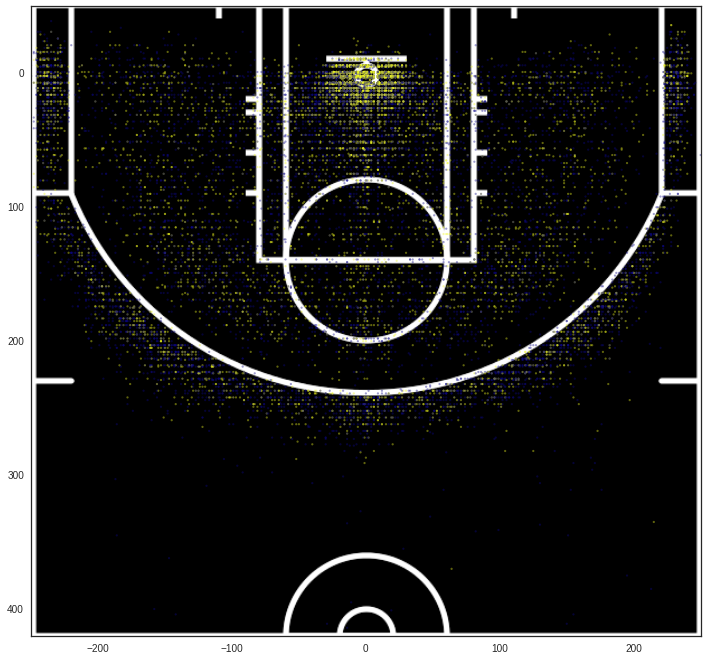

In [118]:
plt.style.use('seaborn-white')
from matplotlib.colors import LinearSegmentedColormap

#cmap = plt.get_cmap('')
fig,ax = plt.subplots(figsize=(12, 12))
scat = plt.scatter(x=player_shot_df.LOC_X,y=player_shot_df.LOC_Y,c=player_shot_df.SHOT_MADE_FLAG,
    cmap=plt.cm.plasma, s=5, alpha=.4, edgecolors='none', zorder=1)
ax.invert_yaxis()

#plt.style.use('grayscale')
court = plt.imread("img/halfcourt.png")
img = plt.imshow(court, zorder=0, extent=[-250,250,420,-50])

plt.show()

In [119]:
player_shot_df.head(10)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500001,2,203083,Andre Drummond,1610612765,Detroit Pistons,1,11,41,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,-6,1,0
1,Shot Chart Detail,0021500001,5,202694,Marcus Morris,1610612765,Detroit Pistons,1,11,21,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,117,67,1,1
2,Shot Chart Detail,0021500001,6,200794,Paul Millsap,1610612737,Atlanta Hawks,1,11,0,Made Shot,Step Back Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,12,76,95,1,1
3,Shot Chart Detail,0021500001,7,203484,Kentavious Caldwell-Pope,1610612765,Detroit Pistons,1,10,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-68,51,1,1
4,Shot Chart Detail,0021500001,8,201143,Al Horford,1610612737,Atlanta Hawks,1,10,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-117,164,1,0
5,Shot Chart Detail,0021500001,10,203083,Andre Drummond,1610612765,Detroit Pistons,1,10,13,Missed Shot,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-79,31,1,0
6,Shot Chart Detail,0021500001,13,200794,Paul Millsap,1610612737,Atlanta Hawks,1,10,1,Made Shot,Turnaround Fadeaway Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,123,3,1,1
7,Shot Chart Detail,0021500001,20,201952,Jeff Teague,1610612737,Atlanta Hawks,1,9,29,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),8-16 ft.,15,-2,154,1,0
8,Shot Chart Detail,0021500001,22,202704,Reggie Jackson,1610612765,Detroit Pistons,1,9,22,Made Shot,Running Pull-Up Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,-25,239,1,1
9,Shot Chart Detail,0021500001,23,201952,Jeff Teague,1610612737,Atlanta Hawks,1,9,12,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,2,1,0


In [150]:
print player_shot_df.columns
fields = [u'GRID_TYPE', u'PERIOD',u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE',
       u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA',
       u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE']
for f in fields:
    print f, player_shot_df[f].unique()


Index([u'GRID_TYPE', u'GAME_ID', u'GAME_EVENT_ID', u'PLAYER_ID',
       u'PLAYER_NAME', u'TEAM_ID', u'TEAM_NAME', u'PERIOD',
       u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE',
       u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA',
       u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE', u'LOC_X', u'LOC_Y',
       u'SHOT_ATTEMPTED_FLAG', u'SHOT_MADE_FLAG'],
      dtype='object')
GRID_TYPE [u'Shot Chart Detail']
PERIOD [1 2 3 4 5 6]
MINUTES_REMAINING [11 10  9  8  7  6  5  4  3  2  1  0]
SECONDS_REMAINING [41 21  0 44 27 13  1 29 22 12 50 34 11 56 30  8 48  6 57 37 35 19 16 55 38
 23 53 33 14 46 31 25 10 47 32  2 20  9 28 36  5 15 40 52 59 54 17  7 42 39
  3 26  4 58 45 49 18 43 24 51]
EVENT_TYPE [u'Missed Shot' u'Made Shot']
ACTION_TYPE [u'Driving Layup Shot' u'Step Back Jump shot' u'Driving Floating Jump Shot'
 u'Jump Shot' u'Turnaround Hook Shot' u'Turnaround Fadeaway Bank Jump Shot'
 u'Pullup Jump shot' u'Running Pull-Up Jump Shot' u'Hook Shot'
 u'Running Layu

In [151]:
player_shot_df['ACTION_TYPE'].value_counts()

Jump Shot                             8800
Layup Shot                            1679
Driving Layup Shot                    1047
Pullup Jump shot                       902
Floating Jump shot                     454
Hook Shot                              373
Step Back Jump shot                    369
Tip Layup Shot                         341
Running Layup Shot                     320
Turnaround Jump Shot                   297
Dunk Shot                              284
Cutting Layup Shot                     264
Running Jump Shot                      243
Fadeaway Jump Shot                     212
Putback Layup Shot                     190
Reverse Layup Shot                     186
Driving Finger Roll Layup Shot         179
Jump Bank Shot                         150
Turnaround Hook Shot                   143
Driving Floating Jump Shot             128
Driving Reverse Layup Shot             119
Driving Dunk Shot                      108
Cutting Dunk Shot                      106
Running Dun

There seems to be a lot of 'Driving' and 'Running' shots with very little difference between them 

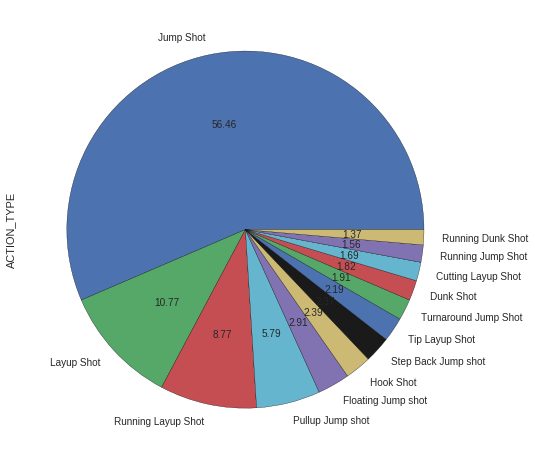

In [181]:
import re
action_counts = player_shot_df['ACTION_TYPE'].map(lambda x: re.sub(u'Driving',u'Running',x)).value_counts()
action_counts.iloc[:13].plot(kind='pie',figsize=(8,8),autopct='%.2f')

In [152]:
player_shot_df[player_shot_df['ACTION_TYPE']=='No Shot']

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
17582,Shot Chart Detail,0021500104,34,203105,Festus Ezeli,1610612744,Golden State Warriors,1,6,51,Made Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1
17584,Shot Chart Detail,0021500104,37,202704,Reggie Jackson,1610612765,Detroit Pistons,1,6,23,Made Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,10,7,1,1
17592,Shot Chart Detail,0021500104,59,101106,Andrew Bogut,1610612744,Golden State Warriors,1,4,16,Missed Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-7,21,1,0
17593,Shot Chart Detail,0021500104,61,101106,Andrew Bogut,1610612744,Golden State Warriors,1,4,14,Made Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,7,1,1
17617,Shot Chart Detail,0021500104,135,2733,Shaun Livingston,1610612744,Golden State Warriors,2,8,35,Missed Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-9,2,1,0
17627,Shot Chart Detail,0021500104,168,201578,Marreese Speights,1610612744,Golden State Warriors,2,6,23,Missed Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,6,13,1,0
17629,Shot Chart Detail,0021500104,173,203382,Aron Baynes,1610612765,Detroit Pistons,2,6,10,Missed Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,3,0,1,0
17693,Shot Chart Detail,0021500104,351,101106,Andrew Bogut,1610612744,Golden State Warriors,3,1,50,Missed Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,1,4,1,0
17694,Shot Chart Detail,0021500104,353,101106,Andrew Bogut,1610612744,Golden State Warriors,3,1,49,Made Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,1,7,1,1
17698,Shot Chart Detail,0021500104,367,101106,Andrew Bogut,1610612744,Golden State Warriors,3,0,48,Made Shot,No Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,16,1,1


These are games from the previous night, that maybe have not yet been correctly coded. To view them, I will write out links to the video of each event. 

In [169]:
def game_event_id_video_link(gid,gevid):
    if isinstance(gid,int):
        gid = str(gid)
    if isinstance(gevid,int):
        gevid = str(gevid)
    return 'http://stats.nba.com/cvp.html?GameID='+gid+'&GameEventID='+gevid

for f,row in player_shot_df[player_shot_df['ACTION_TYPE']=='No Shot'].iterrows():
    print game_event_id_video_link(row['GAME_ID'],row['GAME_EVENT_ID'])

http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=34
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=37
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=59
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=61
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=135
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=168
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=173
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=351
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=353
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=367
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=456
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=483
http://stats.nba.com/cvp.html?GameID=0021500104&GameEventID=476
http://stats.nba.com/cvp.html?GameID=0021500105&GameEventID=11
http://stats.nba.com/cvp.html?GameID=0021500105&GameEventID=23
http://stats.nba.com/cvp.html?GameID=002150010

Looking at them, these 'No Shots' are actual shots (dunks,layups,etc.). I'll remove the 'No Shot's from any plots that use it. Otherwise, the other data appears to be correct (x and y loc, areas), so I will keep it in.

In [185]:
keepfields = ['PLAYER_ID','PLAYER_NAME','SHOT_TYPE','SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_ATTEMPTED_FLAG','SHOT_MADE_FLAG']
TEMP=player_shot_df[keepfields].groupby(['PLAYER_ID','PLAYER_NAME','SHOT_TYPE','SHOT_ZONE_AREA','SHOT_ZONE_RANGE']).sum()
TEMP.head(21)

SHOT_ATTEMPTED_FLAG  \
PLAYER_ID PLAYER_NAME   SHOT_TYPE      SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
708       Kevin Garnett 2PT Field Goal Center(C)             Less Than 8 ft.                    3   
                                       Left Side Center(LC)  16-24 ft.                          4   
                                       Left Side(L)          16-24 ft.                          1   
                                                             8-16 ft.                           3   
                                       Right Side Center(RC) 16-24 ft.                          4   
                                       Right Side(R)         16-24 ft.                          3   
977       Kobe Bryant   2PT Field Goal Center(C)             16-24 ft.                          5   
                                                             8-16 ft.                           3   
                                                             Less Than 8 ft.                   13   
                                       Left Side Center(LC)  16-24 ft.                          2   
                                       Left Side(L)          16-24 ft.                          2   
                                                             8-16 ft.                           5   
                                       Right Side Center(RC) 16-24 ft.                          9   
                                       Right Side(R)         16-24 ft.                          4   
                                                             8-16 ft.                           6   
                        3PT Field Goal Back Court(BC)        Back Court Shot                    1   
                                       Center(C)             24+ ft.                            7   
                                       Left Side Center(LC)  24+ ft.                           13   
                                       Left Side(L)          24+ ft.                            3   
                                       Right Side Center(RC) 24+ ft.                           17   
                                       Right Side(R)         24+ ft.                            7   

                                                                              SHOT_MADE_FLAG  
PLAYER_ID PLAYER_NAME   SHOT_TYPE      SHOT_ZONE_AREA        SHOT_ZONE_RANGE                  
708       Kevin Garnett 2PT Field Goal Center(C)             Less Than 8 ft.               2  
                                       Left Side Center(LC)  16-24 ft.                     1  
                                       Left Side(L)          16-24 ft.                     0  
                                                             8-16 ft.                      0  
                                       Right Side Center(RC) 16-24 ft.                     2  
                                       Right Side(R)         16-24 ft.                     1  
977       Kobe Bryant   2PT Field Goal Center(C)             16-24 ft.                     3  
                                                             8-16 ft.                      1  
                                                             Less Than 8 ft.               8  
                                       Left Side Center(LC)  16-24 ft.                     0  
                                       Left Side(L)          16-24 ft.                     1  
                                                             8-16 ft.                      2  
                                       Right Side Center(RC) 16-24 ft.                     4  
                                       Right Side(R)         16-24 ft.                     1  
                                                             8-16 ft.                      1  
                        3PT Field Goal Back Court(BC)        Back Court Shot               0  
                                       Cente

In [134]:
drop_fields = ['PERIOD','MINUTES_REMAINING','SECONDS_REMAINING',]
player_shot_df.drop?

In [220]:
mask = TEMP['SHOT_ATTEMPTED_FLAG']>=8

In [221]:
shot_zones_df = TEMP.loc[mask]

In [222]:
TEMP2=shot_zones_df.assign(FG_PCT = shot_zones_df['SHOT_MADE_FLAG']/shot_zones_df['SHOT_ATTEMPTED_FLAG'])

In [223]:
TEMP2.head(15)

SHOT_ATTEMPTED_FLAG  \
PLAYER_ID PLAYER_NAME    SHOT_TYPE      SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
977       Kobe Bryant    2PT Field Goal Center(C)             Less Than 8 ft.                   13   
                                        Right Side Center(RC) 16-24 ft.                          9   
                         3PT Field Goal Left Side Center(LC)  24+ ft.                           13   
                                        Right Side Center(RC) 24+ ft.                           17   
1495      Tim Duncan     2PT Field Goal Center(C)             Less Than 8 ft.                   27   
1717      Dirk Nowitzki  2PT Field Goal Center(C)             Less Than 8 ft.                    8   
                                        Left Side(L)          8-16 ft.                           8   
                                        Right Side(R)         8-16 ft.                          13   
                         3PT Field Goal Center(C)             24+ ft.                            8   
1938      Manu Ginobili  2PT Field Goal Center(C)             Less Than 8 ft.                   22   
                         3PT Field Goal Left Side Center(LC)  24+ ft.                           11   
                                        Right Side Center(RC) 24+ ft.                            8   
2037      Jamal Crawford 2PT Field Goal Center(C)             Less Than 8 ft.                   15   
2199      Tyson Chandler 2PT Field Goal Center(C)             Less Than 8 ft.                   27   
2200      Pau Gasol      2PT Field Goal Center(C)             16-24 ft.                         18   

                                                                               SHOT_MADE_FLAG  \
PLAYER_ID PLAYER_NAME    SHOT_TYPE      SHOT_ZONE_AREA        SHOT_ZONE_RANGE                   
977       Kobe Bryant    2PT Field Goal Center(C)             Less Than 8 ft.               8   
                                        Right Side Center(RC) 16-24 ft.                     4   
                         3PT Field Goal Left Side Center(LC)  24+ ft.                       3   
                                        Right Side Center(RC) 24+ ft.                       5   
1495      Tim Duncan     2PT Field Goal Center(C)             Less Than 8 ft.              18   
1717      Dirk Nowitzki  2PT Field Goal Center(C)             Less Than 8 ft.               6   
                                        Left Side(L)          8-16 ft.                      6   
                                        Right Side(R)         8-16 ft.                      5   
                         3PT Field Goal Center(C)             24+ ft.                       5   
1938      Manu Ginobili  2PT Field Goal Center(C)             Less Than 8 ft.              13   
                         3PT Field Goal Left Side Center(LC)  24+ ft.                       4   
                                        Right Side Center(RC) 24+ ft.                       3   
2037      Jamal Crawford 2PT Field Goal Center(C)             Less Than 8 ft.               8   
2199      Tyson Chandler 2PT Field Goal Center(C)             Less Than 8 ft.              16   
2200      Pau Gasol      2PT Field Goal Center(C)             16-24 ft.                     8   

                                                                                 FG_PCT  
PLAYER_ID PLAYER_NAME    SHOT_TYPE      SHOT_ZONE_AREA        SHOT_ZONE_RANGE            
977       Kobe Bryant    2PT Field Goal Center(C)             Less Than 8 ft.  0.615385  
                                        Right Side Center(RC) 16-24 ft.        0.444444  
                         3PT Field Goal Left Side Center(LC)  24+ ft.          0.230769  
                                        Right Side Center(RC) 24+ ft.          0.294118  
1495      Tim Duncan     2PT Field Goal Center(C)             Less Than 8 ft.  0.666667  
1717      Dirk Nowitzki  2PT Field Goal Center(C)             Le

In [224]:
idx=pd.IndexSlice
TEMP2.loc[idx[:,:,['2PT Field Goal'],['Center(C)'],['16-24 ft.']],idx[['FG_PCT']]].sort_values(by='FG_PCT',ascending=False)
#TEMP2.unstack()

,,,,,FG_PCT
PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,
201572,Brook Lopez,2PT Field Goal,Center(C),16-24 ft.,0.666667
201586,Serge Ibaka,2PT Field Goal,Center(C),16-24 ft.,0.555556
101127,Jarrett Jack,2PT Field Goal,Center(C),16-24 ft.,0.500000
202331,Paul George,2PT Field Goal,Center(C),16-24 ft.,0.500000
2200,Pau Gasol,2PT Field Goal,Center(C),16-24 ft.,0.444444
201188,Marc Gasol,2PT Field Goal,Center(C),16-24 ft.,0.400000
201933,Blake Griffin,2PT Field Goal,Center(C),16-24 ft.,0.368421
201941,Jordan Hill,2PT Field Goal,Center(C),16-24 ft.,0.250000
200746,LaMarcus Aldridge,2PT Field Goal,Center(C),16-24 ft.,0.166667


In [208]:
TEMP2.loc[[TEMP2['SHOT_TYPE']=='2PT Field Goal' and TEMP2['SHOT_ZONE_AREA']=='Center(C)' and TEMP2['SHOT_ZONE_RANGE']=='Less Than 8 ft.'],['FG_PCT']]

KeyError: 'SHOT_TYPE'

In [132]:
shot_t_za_zr_mask = [shot_zones_df['SHOT_TYPE']=='2PT Field Goal' and shot_zones_df['SHOT_ZONE_AREA']=='Center(C)' and shot_zones_df['SHOT_ZONE_RANGE']=='Less Than 8 ft.']

KeyError: 'SHOT_TYPE'